# Figuras da Aula: Árvores, Redes e Ensemble Learning no Contexto de Engenharia de Biossistemas

---

In [ ]:
# Importar Pacotes

import numpy as np
import matplotlib.pyplot as plt

Exemplo de problemas de Classificação e Regressão

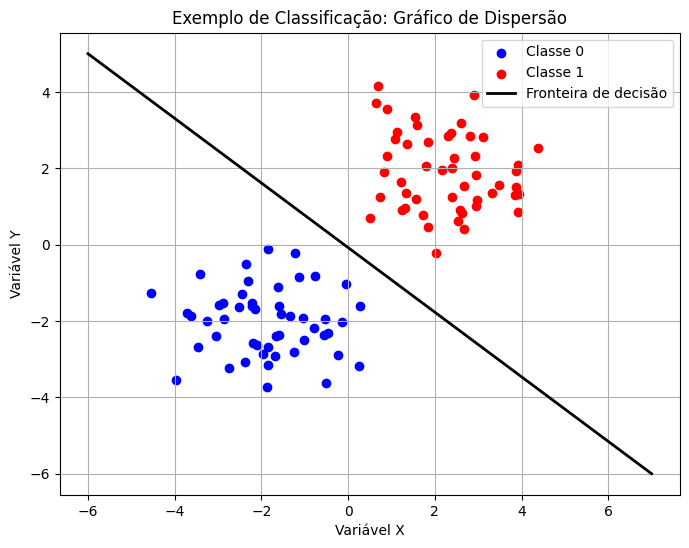

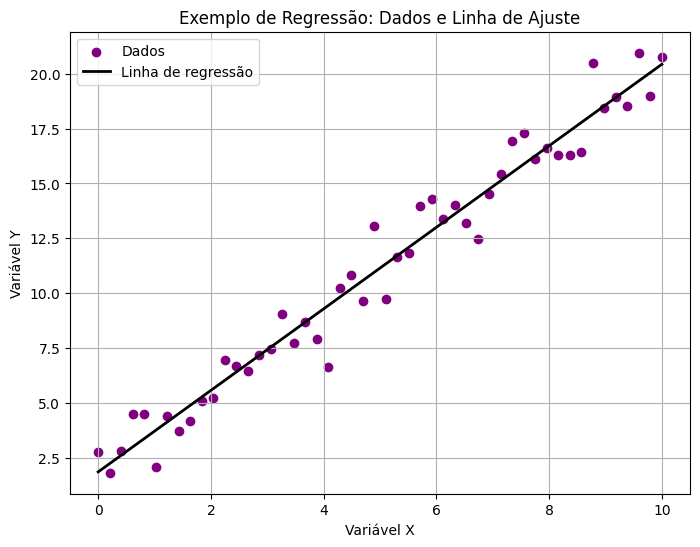

In [ ]:


# Figura (a): Exemplo de Classificação com Fronteira de Decisão
np.random.seed(0)  # para reprodutibilidade

# Gerando dados para duas classes
n_points = 50
x_class0 = np.random.randn(n_points) - 2
y_class0 = np.random.randn(n_points) - 2

x_class1 = np.random.randn(n_points) + 2
y_class1 = np.random.randn(n_points) + 2

plt.figure(figsize=(8, 6))
plt.scatter(x_class0, y_class0, color='blue', label='Classe 0')
plt.scatter(x_class1, y_class1, color='red', label='Classe 1')

# Definindo a fronteira de decisão (linha reta)
# Exemplo: linha y = x
plt.plot([-6,7], [5,-6], color='black', linestyle='-', linewidth=2, label='Fronteira de decisão')

plt.title('Exemplo de Classificação: Gráfico de Dispersão')
plt.xlabel('Variável X')
plt.ylabel('Variável Y')
plt.legend()
plt.grid(True)
plt.show()

# Figura (b): Exemplo de Regressão Linear
# Gerando dados para regressão: y = 2x + 1 + ruído
np.random.seed(0)
x = np.linspace(0, 10, 50)
noise = np.random.randn(50)
y = 2 * x + 1 + noise

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='purple', label='Dados')
# Ajuste de uma regressão linear
coef = np.polyfit(x, y, 1)
y_fit = np.polyval(coef, x)
plt.plot(x, y_fit, color='black', linestyle='-', linewidth=2, label='Linha de regressão')

plt.title('Exemplo de Regressão: Dados e Linha de Ajuste')
plt.xlabel('Variável X')
plt.ylabel('Variável Y')
plt.legend()
plt.grid(True)
plt.show()


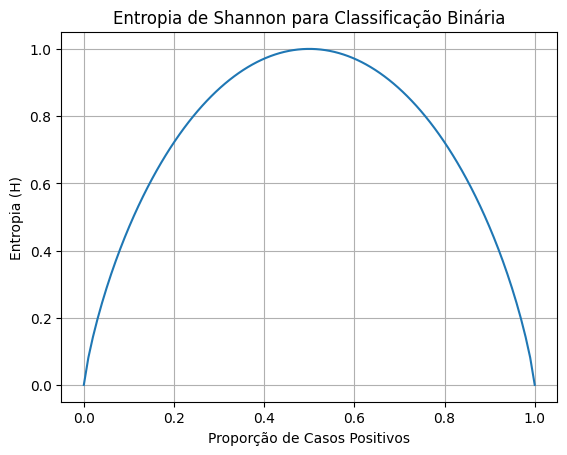

In [ ]:

def shannon_entropy(p):
  """Calcula a entropia de Shannon.

  Args:
    p: Probabilidade de um evento.

  Returns:
    A entropia de Shannon.
  """
  if p == 0 or p == 1:
    return 0
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Gerar dados para o gráfico
proporcoes_positivos = np.linspace(0, 1, 100)
entropias = [shannon_entropy(p) for p in proporcoes_positivos]

# Criar o gráfico
plt.plot(proporcoes_positivos, entropias)
plt.xlabel('Proporção de Casos Positivos')
plt.ylabel('Entropia (H)')
plt.title('Entropia de Shannon para Classificação Binária')
plt.grid(True)
plt.show()


In [ ]:
def shannon_entropy(p):
  """Calcula a entropia de Shannon.

  Args:
    p: Probabilidade de um evento.

  Returns:
    A entropia de Shannon.
  """
  if p == 0 or p == 1:
    return 0
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


def calculate_information_gain(parent_entropy, child_entropies, child_proportions):
  """Calcula o ganho de informação.

  Args:
    parent_entropy: Entropia do nó pai.
    child_entropies: Lista de entropias dos nós filhos.
    child_proportions: Lista de proporções de exemplos que vão para cada nó filho.

  Returns:
    O ganho de informação.
  """
  weighted_child_entropy = sum(
      [p * e for p, e in zip(child_proportions, child_entropies)])
  return parent_entropy - weighted_child_entropy


# Exemplo de uso:

# Entropia do nó pai (considerando um conjunto de dados com 50% de exemplos positivos e 50% negativos)
parent_entropy = shannon_entropy(0.5)

# Suponha que um atributo divide os dados em dois nós filhos:
# Nó 1: 70% de exemplos positivos, 30% de exemplos negativos
child_entropy_1 = shannon_entropy(0.7)
child_proportion_1 = 0.6  # 60% dos exemplos vão para o nó 1

# Nó 2: 30% de exemplos positivos, 70% de exemplos negativos
child_entropy_2 = shannon_entropy(0.3)
child_proportion_2 = 0.4  # 40% dos exemplos vão para o nó 2

information_gain = calculate_information_gain(
    parent_entropy, [child_entropy_1, child_entropy_2],
    [child_proportion_1, child_proportion_2])

print(f"Ganho de Informação: {information_gain}")

Ganho de Informação: 0.1187091007693073
